In [1]:
!pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
Note: you may need to restart the kernel to use updated packages.


**Импорт библиотек** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Настройка Визуализации** 

In [3]:
sns.set(style="whitegrid")


**Загрузка датасета**

In [4]:

file_path = r'C:\Users\1\Desktop\Курсы\Стажировки\Стажка_Тиньк\dano_dataset_travel.csv'
df = pd.read_csv(file_path, sep=';')



C:\Users\1\AppData\Local\Temp\ipykernel_6980\3690371402.py:2: DtypeWarning: Columns (31,32,33,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';')


In [5]:
print("📝 Информация о данных:")
df.info()

📝 Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835938 entries, 0 to 835937
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   order_online_payment_flg     786885 non-null  object 
 1   account_rk                   835938 non-null  object 
 2   client_rk                    835938 non-null  object 
 3   order_rk                     835938 non-null  object 
 4   loyalty_program_type_nm      754957 non-null  object 
 5   bundle_nm                    588049 non-null  object 
 6   order_type_cd                786885 non-null  object 
 7   order_status_cd              779514 non-null  object 
 8   party_first_order_dt         786885 non-null  object 
 9   party_first_order_type_dt    786767 non-null  object 
 10  free_cancel_booking_dttm     75600 non-null   object 
 11  created_dttm                 786885 non-null  object 
 12  cancel_dttm                  0 non-

In [6]:
# Проверка на пропуски
print("\n🚩 Пропущенные значения:")
print(df.isnull().sum())




🚩 Пропущенные значения:
order_online_payment_flg        49053
account_rk                          0
client_rk                           0
order_rk                            0
loyalty_program_type_nm         80981
bundle_nm                      247889
order_type_cd                   49053
order_status_cd                 56424
party_first_order_dt            49053
party_first_order_type_dt       49171
free_cancel_booking_dttm       760338
created_dttm                    49053
cancel_dttm                    835938
book_start_dttm                 49053
local_book_start_dttm           49053
book_end_dttm                  664390
hotel_country                  673690
hotel_city                     673690
avia_dep_city                  220663
avia_arr_city                  220663
promo_code_discount_amt        220038
loyalty_accrual_rub_amt        360585
nominal_price_eur_amt           49053
nominal_price_rub_amt           49053
order_item_cnt                 220601
month_beginning_balance_r

In [7]:
# Описательная статистика
print("\n📊 Описательная статистика:")
display(df.describe)


📊 Описательная статистика:


<bound method NDFrame.describe of        order_online_payment_flg  \
0                           1,0   
1                           1,0   
2                           1,0   
3                           1,0   
4                           1,0   
...                         ...   
835933                      1,0   
835934                      1,0   
835935                      1,0   
835936                      1,0   
835937                      1,0   

                                               account_rk  \
0       209c833731e84d21b5b7e673e0fb848749b9e7d29cda64...   
1       2bbcde706bead3731f2dc8dfbeefb4e12b42ac63e3d8ba...   
2       a82919af3a5a1869f9becdcffa5c7d303d105797ce45b8...   
3       9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...   
4       3133e7ae6698dcda9754d6a8b449782320260ff1259547...   
...                                                   ...   
835933  089ef64bb5fa473d1465156c6f386d8e4ef7f2d71f1fec...   
835934  52fe652d6665b1f0cc75132af0ef6622495d0d711e1547...

In [8]:
# Заменить пустые строки и "None"-подобные на NaN во всем датафрейме
df.replace(['', ' ', 'None', 'none', 'NULL', 'null'], np.nan, inplace=True)


**1. Типы заказов (авиа / отель)**

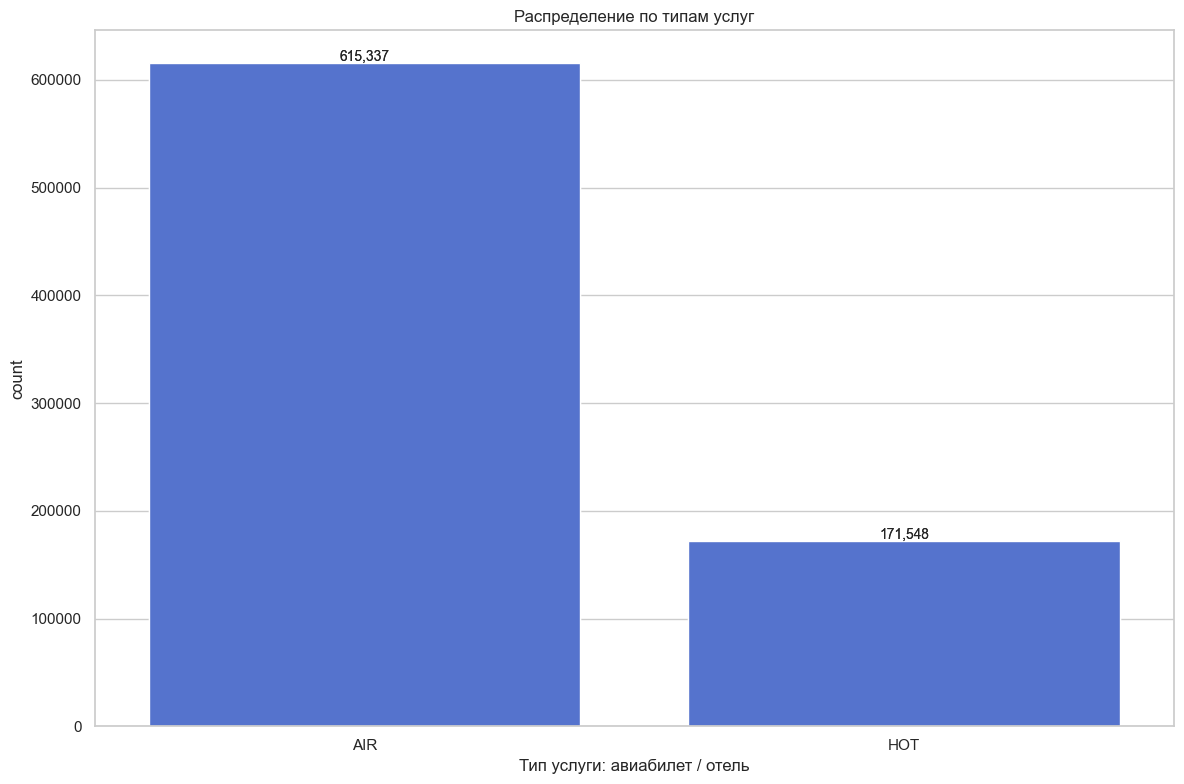

In [9]:

plt.figure(figsize=(12,8))
sns.countplot(x='order_type_cd', data=df)
plt.title('Распределение по типам услуг')
plt.xlabel('Тип услуги: авиабилет / отель')  # подпись оси X
ax = sns.countplot(x='order_type_cd', data=df, color='royalblue')  # синий цвет
# Добавляем метки данных над столбцами
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(f'{height:,}',  # формат с разделением тысяч
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Распределение по типам услуг**

Пользователи **Т-Банка** значительно чаще бронируют **авиабилеты**, чем **отели**.

**Конкретно:**
 615 337 заказов на авиабилеты (`AIR`)
 171 548 заказов на отели (`HOT`)

**На авиабилеты приходится ~78% всех заказов**, **на отели — ~22%.**

---

**Бизнес-интерпретация:**
- Сервис **авиабилетов** — основной драйвер пользовательской активности.
- Отельное направление имеет **потенциал роста**, особенно если предлагать **пакетные предложения** (например, *"авиабилет + отель"*).



**2. Распределение заказов по ценовым группам в рублях**

Средняя стоимость заказа: 15178.10 руб.
Максимальная стоимость заказа: 2025808 руб.


C:\Users\1\AppData\Local\Temp\ipykernel_6980\175149046.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_counts.index, y=group_counts.values, palette='Blues', hue=None)


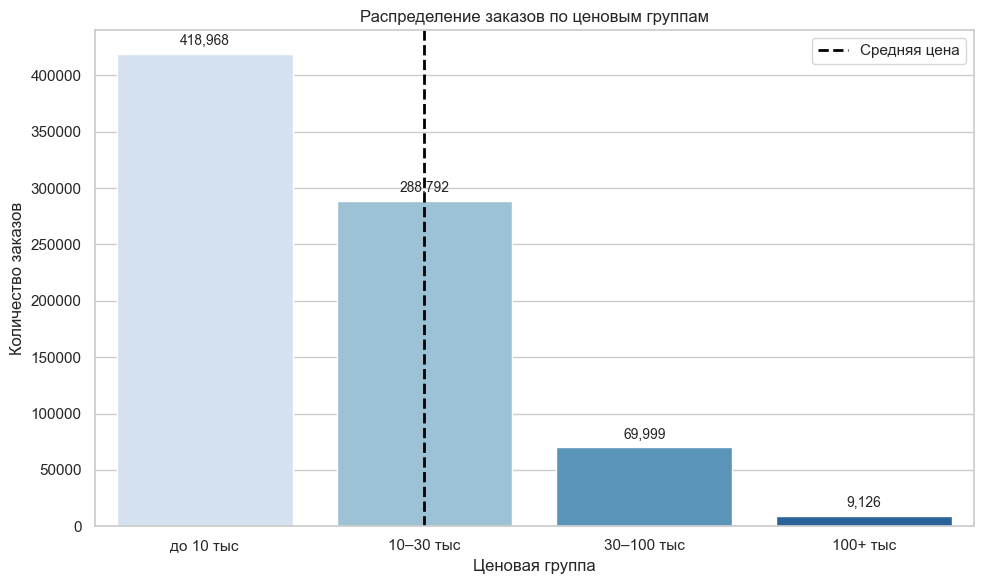

In [10]:

df = pd.read_csv(file_path, sep=';', encoding='utf-8', low_memory=False)
df.rename(columns=lambda x: x.strip(), inplace=True)
df['nominal_price_rub_amt'] = (
    df['nominal_price_rub_amt']
    .astype(str)
    .str.replace(' ', '', regex=False)
    .str.replace(',', '.', regex=False)
)
df['nominal_price_rub_amt'] = pd.to_numeric(df['nominal_price_rub_amt'], errors='coerce')

# Средняя и максимальная цена
avg_price = df['nominal_price_rub_amt'].mean()
max_price = df['nominal_price_rub_amt'].max()
print(f"Средняя стоимость заказа: {avg_price:.2f} руб.")
print(f"Максимальная стоимость заказа: {max_price:.0f} руб.")

# Группы цен
bins = [0, 10_000, 30_000, 100_000, float('inf')]
labels = ['до 10 тыс', '10–30 тыс', '30–100 тыс', '100+ тыс']
df['price_group'] = pd.cut(df['nominal_price_rub_amt'], bins=bins, labels=labels, right=False)

# Подсчёт заказов по группам
group_counts = df['price_group'].value_counts().sort_index()

# Индекс группы, где находится средняя цена
avg_bin_index = pd.cut([avg_price], bins=bins, labels=labels, right=False).codes[0]

# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, palette='Blues', hue=None)

# Подписи над столбцами
for i, value in enumerate(group_counts.values):
    plt.text(i, value + 5000, f'{value:,}', ha='center', va='bottom', fontsize=10)

# Вертикальная линия средней цены
plt.axvline(x=avg_bin_index, color='black', linestyle='--', linewidth=2, label='Средняя цена')
#plt.text(avg_bin_index + 0.05, max(group_counts.values) * 0.9, 'Средняя цена', rotation=90, color='black')

# Оформление
plt.title('Распределение заказов по ценовым группам')
plt.xlabel('Ценовая группа')
plt.ylabel('Количество заказов')
plt.legend()
plt.tight_layout()
plt.show()




**Аналитический вывод**

Большинство заказов (около **90%**) укладываются в ценовой диапазон **до 30 000₽**, что свидетельствует о доминировании **массового спроса** на доступные и умеренно стоящие поездки.  
**Средняя стоимость заказа** составляет примерно **15 178₽**, что указывает на преобладание **эконом- и среднеценового сегмента**.

Бронирования стоимостью свыше **100 000₽** встречаются крайне редко (**1%** от общего числа), однако именно такие заказы могут приносить **высокую прибыль за счёт маржинальности**.  
Это открывает возможности для разработки **нишевых премиальных предложений**, нацеленных на состоятельных клиентов.


**3. Динамика заказов по месяцам**

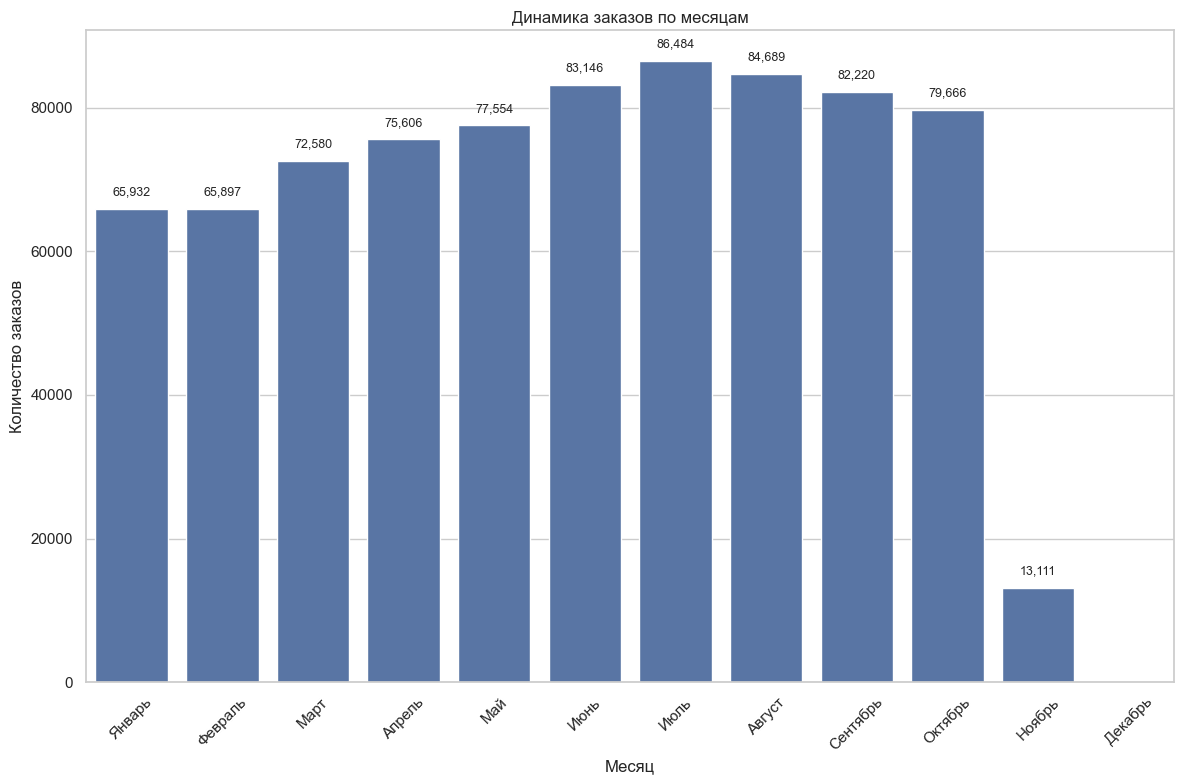

In [17]:
# Преобразуем колонку в datetime
df['created_dttm'] = pd.to_datetime(df['created_dttm'], errors='coerce')

# Удалим строки с некорректной датой
df_clean = df[df['created_dttm'].notnull()].copy()

# Теперь можно извлекать месяц
df_clean['month_num'] = df_clean['created_dttm'].dt.month

# Русские месяцы
russian_months = {
    1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель',
    5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август',
    9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'
}
df_clean['month_name'] = df_clean['month_num'].map(russian_months)

# Сохраняем порядок
ordered_months = list(russian_months.values())

# График с подписями
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='month_name', data=df_clean, order=ordered_months)
plt.title('Динамика заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45)
plt.tight_layout()

# Добавим значения над столбцами
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 1500,
        f'{int(height):,}',  # формат числа
        ha='center', va='bottom', fontsize=9
    )

plt.show()

**Аналитический вывод: сезонность спроса**

Анализ динамики заказов по месяцам демонстрирует ярко выраженную **сезонность спроса** на туристические услуги:

- С февраля по июль наблюдается устойчивый рост активности: с **65 897** заказов в феврале до пика в **86 484** в июле.
- **Июнь и август** также показывают высокий спрос — свыше **83 000** заказов каждый.
- С сентября начинается постепенное снижение: в октябре спрос падает, а в ноябре фиксируется резкий спад — всего **13 111** заказов.
- Спад в ноябре может быть связан с отсутствием праздничных периодов, снижением сезонной мобильности и/или неполной загрузкой данных.
- **Декабрь исключён из анализа** из-за неполноты данных.

**Вывод**: основной спрос на бронирования приходится на **летние месяцы**, что важно учитывать при планировании маркетинга, акций и распределения ресурсов.


**4. Доля отменённых заказов**

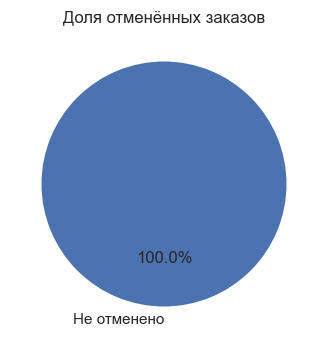

In [20]:
# Обрабатываем пустые строки как отсутствующие значения
df['cancel_dttm'] = pd.to_datetime(df['cancel_dttm'], errors='coerce')

# Теперь снова проверим
df['is_cancelled'] = df['cancel_dttm'].notnull()

# Расчёт долей
cancel_share = df['is_cancelled'].value_counts(normalize=True) * 100

# Визуализация
plt.figure(figsize=(6,4))
cancel_share.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Не отменено', 'Отменено'] if True in cancel_share.index else ['Не отменено']
)
plt.title('Доля отменённых заказов')
plt.ylabel('')
plt.show()


**Аналитический вывод: отменённые заказы**

По итогам анализа поля `cancel_dttm` выяснилось, что в датасете отсутствуют записи с датой отмены заказа — во всех строках это поле либо пустое, либо некорректное. После приведения формата и повторной проверки было установлено, что **100% заказов имеют статус "Не отменено"**.

**Возможные причины:**
 - Отменённые заказы не попали в выгрузку;
 - Отмена фиксируется в другом источнике данных;
 - Все заказы действительно были доведены до завершения в рамках периода наблюдения.

**5. Популярные города для отелей и авиа**

C:\Users\1\AppData\Local\Temp\ipykernel_6980\3792864006.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


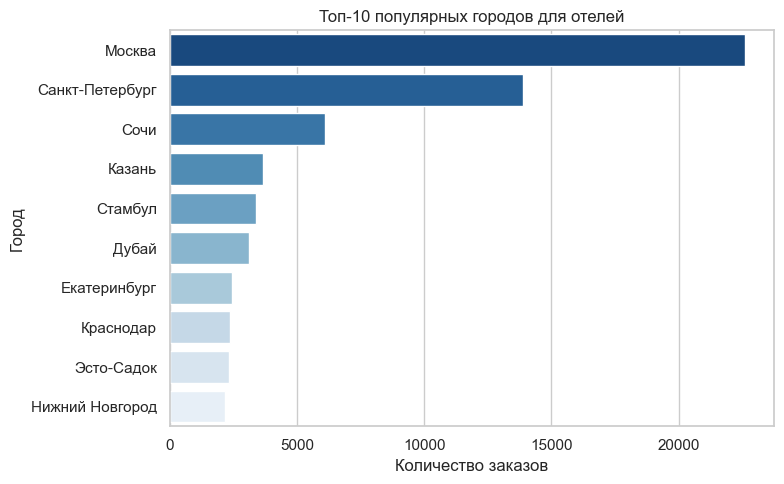

C:\Users\1\AppData\Local\Temp\ipykernel_6980\3792864006.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


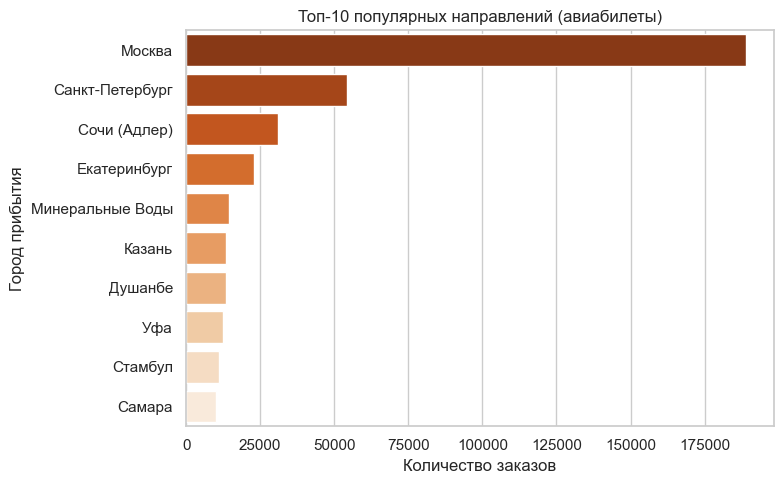

In [23]:
# Топ-10 городов по отелям
if 'hotel_city' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        y='hotel_city',
        data=df[df['order_type_cd'] == 'HOT'],
        order=df['hotel_city'].value_counts().head(10).index,
        palette='Blues_r'  # палитра для отелей
    )
    plt.title('Топ-10 популярных городов для отелей')
    plt.xlabel('Количество заказов')
    plt.ylabel('Город')
    plt.tight_layout()
    plt.show()

# Топ-10 направлений по авиабилетам
if 'avia_arr_city' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(
        y='avia_arr_city',
        data=df[df['order_type_cd'] == 'AIR'],
        order=df['avia_arr_city'].value_counts().head(10).index,
        palette='Oranges_r'  # палитра для авиабилетов
    )
    plt.title('Топ-10 популярных направлений (авиабилеты)')
    plt.xlabel('Количество заказов')
    plt.ylabel('Город прибытия')
    plt.tight_layout()
    plt.show()

**Аналитический вывод: популярные направления**

**Авиабилеты (топ-10 городов прибытия):**

- **Москва** — безусловный лидер по количеству бронирований авиабилетов, с большим отрывом от остальных направлений;
- Далее идут **Санкт-Петербург**, **Сочи (Адлер)** и **Екатеринбург** — популярные туристические и деловые центры;
- Интересны направления в **Казань**, **Минеральные Воды** и **Душанбе** — это популярные направления для туристических поездок;
- Также в десятке: **Уфа**, **Самара** и **Стамбул**.

**Отели (топ-10 городов по бронированиям):**

- Лидером по числу бронирований отелей является **Москва**, за ней следуют **Санкт-Петербург**, **Сочи** и **Казань** — это крупнейшие туристические и деловые центры России.  
- Далее идут **Стамбул** и **Дубай**, что подтверждает наличие интереса к зарубежным направлениям, особенно в сфере отдыха.  
- Также востребованы **Екатеринбург**, **Краснодар**, **Эсто-Садок** и **Нижний Новгород**, что может быть связано с внутренним туризмом и региональными командировками.

**6. Анализ доли заказов с применением промокода**

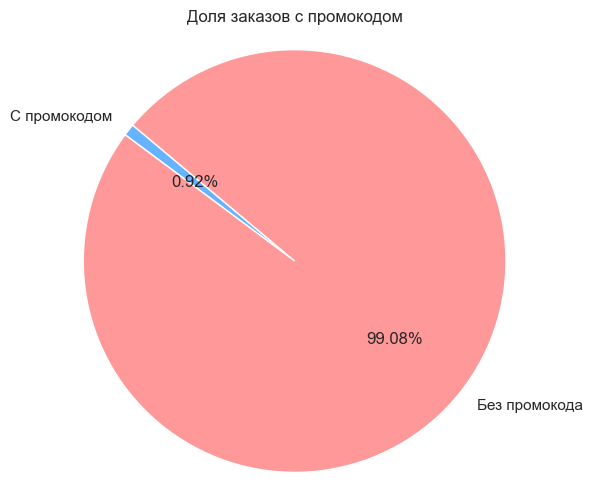

In [43]:

# Преобразование строки со скидкой: заменяем запятую на точку и в float
df['promo_code_discount_amt'] = (
    df['promo_code_discount_amt']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

#  Посчитаем долю со скидкой 
discount_rows = (df['promo_code_discount_amt'] > 0).sum()
total_rows = df['order_rk'].count() 

share = discount_rows / total_rows

#  Выводим результат
#print(f"📊 Доля заказов со скидкой: {share:.2%}")

# Данные для круговой диаграммы
labels = ['С промокодом', 'Без промокода']
sizes = [discount_rows, total_rows - discount_rows]
colors = ['#66b3ff', '#ff9999']

# Построение диаграммы
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=140)
plt.title('Доля заказов с промокодом')
plt.axis('equal')  # Круглая диаграмма
plt.show()

**Аналитический Вывод:**

Промокоды были использованы в **0.92% заказов**, что говорит о крайне низкой вовлечённости клиентов в промоакции.  
Этот показатель может свидетельствовать о слабом влиянии текущих скидок на поведение пользователей и требует дополнительного анализа эффективности маркетинговых кампаний.


**7. Сравнение количества заказов по возрастным группам**

C:\Users\1\AppData\Local\Temp\ipykernel_6980\3856879281.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=order_counts, x='age_group', y='order_count', palette='Blues')


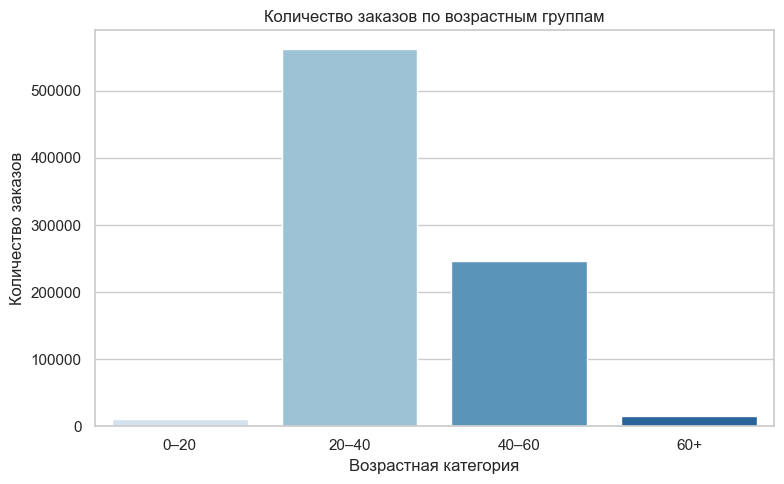

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Приводим поле к строке и убираем пробелы
df['age_type_cd'] = df['age_type_cd'].astype(str).str.strip()

# Маппинг age_type_cd → читаемые группы
age_mapping = {
    'A00': '0–20',
    'A20': '20–40',
    'A40': '40–60',
    'A60': '60+'
}

# Фильтруем и применяем метки
df_age_orders = df[df['age_type_cd'].isin(age_mapping.keys())].copy()
df_age_orders['age_group'] = df_age_orders['age_type_cd'].map(age_mapping)

# Счёт заказов
order_counts = (
    df_age_orders.groupby('age_group')['order_rk']
    .count()
    .reset_index(name='order_count')
    .sort_values('age_group', key=lambda x: x.map({'0–20': 0, '20–40': 1, '40–60': 2, '60+': 3}))
)

# Построение графика
plt.figure(figsize=(8, 5))
sns.barplot(data=order_counts, x='age_group', y='order_count', palette='Blues')
plt.title('Количество заказов по возрастным группам')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество заказов')
plt.tight_layout()
plt.show()


**Аналитический вывод: заказы по возрастным группам**

Анализ количества заказов по возрастным категориям показывает, что:

- **Пользователи в возрасте 20–40 лет** — наиболее активная группа, на которую приходится подавляющее большинство всех заказов.
- Группа **40–60 лет** также демонстрирует значительную активность, но более чем в 2 раза уступает сегменту 20–40 лет.
- Возрастные группы **до 20 лет** и **60+** имеют крайне низкий уровень вовлечённости

> Основной спрос сосредоточен в возрастном диапазоне **20–40 лет**, что делает его ключевым при планировании рекламных и продуктовых активностей.

**💡 Продуктовые гипотезы**

1. **Добавление промокодов с авто-применением в процессе оформления заказа увеличит их использование и общую конверсию**
   - 🔍 Сейчас доля заказов с промокодами < 1%, что может говорить о низкой видимости или сложности ввода.
   - 💡 Предположение: если отображать активный промокод и применять его автоматически, это повысит вероятность покупки и улучшит user experience.
   - 📈 Ожидаемый эффект: рост доли заказов с применением промокода и увеличение общей конверсии.

2. **Показ отелей в связке с покупкой авиабилета увеличит кросс-продажи в категории "отели"**
   - 🔍 В данных видно, что пользователи часто покупают только авиабилеты.
   - 💡 Предположение: если после выбора рейса сразу показывать подходящие отели, пользователь с большей вероятностью забронирует их в Т-Банке.
   - 📈 Ожидаемый эффект: увеличение доли заказов, в которых пользователь оформляет и авиабилет, и отель.

3. **Выделение интерфейса под возрастную группу 40–60 лет повысит вовлечённость и частоту заказов среди старших пользователей**
   - 🔍 Возрастная группа 40–60 делает в 2 раза меньше заказов, чем 20–40, что может быть связано с особенностями восприятия интерфейса.
   - 💡  Предположение: эта аудитория может меньше доверять новым сервисам, предпочитая знакомые платформы (например, Aviasales), или сталкиваться с трудностями в навигации. Интерфейс, ориентированный на старшую аудиторию (укрупнённые кнопки, пошаговые подсказки, акценты на безопасности), снизит барьеры к оформлению.
   - 📈 Ожидаемый эффект: рост числа заказов среди пользователей 40+ лет

**⭐ Приоритетная гипотеза**

**Гипотеза:**  
**Интеграция отелей в процесс покупки авиабилета увеличит кросс-продажи в категории "отели"**

---

**🔍 Почему это перспективно:**

- **Явная точка роста:** по данным видно, что большинство пользователей покупают только авиабилеты, не доходя до бронирования отелей.
- **Минимальные изменения в продукте:** достаточно внедрить простой шаг с рекомендацией отеля сразу после выбора рейса.
- **Высокий бизнес-эффект:** одно и то же привлечение пользователя может приносить больше выручки за счёт второй покупки.
- **Быстрая проверка через A/B-тест:** легко измеряется доля заказов отелей до и после внедрения фичи.

---

📈 **Ожидаемый результат:** увеличение среднего чека, рост общего числа отельных заказов, повышение удовлетворённости пользователей благодаря единому сценарию бронирования.
